In [8]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from pandas.plotting import table

%matplotlib inline

## Loading Data

In [11]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')
temp = train.loc[:,["Platform","Year_of_Release","Genre","Publisher","Critic_Score","Critic_Count","User_Score","User_Count"]]
temp

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count
0,PS3,2012,Role-Playing,Namco Bandai Games,71,59,7.9,216
1,PS2,2002,Role-Playing,Atari,75,35,8.5,60
2,PS2,2002,Role-Playing,Atari,76,24,8.9,81
3,PS2,2002,Role-Playing,Atari,70,23,8.7,19
4,PC,2012,Action,Activision,76,12,6.4,389
5,PS3,2012,Action,Activision,79,39,6.8,179
6,X360,2012,Action,Activision,74,69,7.0,173
7,PS3,2009,Action,Activision,79,53,7.7,308
8,X360,2009,Action,Activision,78,83,7.8,356
9,PS,2000,Racing,Electronic Arts,51,16,4.6,14


### Preprocessing

For data preprocessing, we used one-hot encoding.

In [12]:
Genre = temp.loc[:,["Genre"]]
Genre

,Genre
0,Role-Playing
1,Role-Playing
2,Role-Playing
3,Role-Playing
4,Action
5,Action
6,Action
7,Action
8,Action
9,Racing


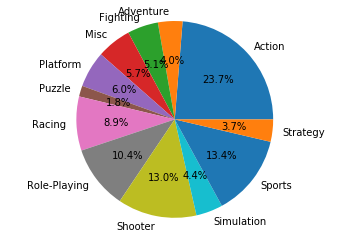

In [13]:
labels = train['Genre'].astype('category').cat.categories.tolist()
counts = train['Genre'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

In [290]:
pd.get_dummies(Genre, columns=['Genre'], prefix = ['Genre'])

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6199,0,0,0,0,0,0,0,0,1,0,0,0
6200,0,0,0,0,0,0,0,0,1,0,0,0
6201,0,0,0,0,0,0,0,0,1,0,0,0
6202,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
X = temp.copy()
X = pd.get_dummies(X, columns=['Genre'], prefix = ['Genre'])
X = pd.get_dummies(X, columns=['Year_of_Release'], prefix = ['Year_of_Release'])
X = pd.get_dummies(X, columns=['Platform'], prefix = ['Platform'])
X = pd.get_dummies(X, columns=['Publisher'], prefix = ['Publisher'])
X.fillna(0)
X

,Critic_Score,Critic_Count,User_Score,User_Count,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software
0,71,59,7.9,216,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75,35,8.5,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76,24,8.9,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,70,23,8.7,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,12,6.4,389,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,79,39,6.8,179,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,74,69,7.0,173,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,79,53,7.7,308,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,78,83,7.8,356,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,51,16,4.6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Perform Linear Reression

Linear regression produces a model in the form:


$$
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}
$$


In our dataset, we have two variables/degress to predict.

They are user_score and critic_score.

As a result, we will have a form:


$$
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2}
$$

Next, we are going to find $\beta$ by performing linear regression

Next, we are going to test this model.

In [15]:
def rmse(pred, test): 
    rmse = 0.0
    N = test.shape[0]
    for i in range(N):
        rmse += (pred[i] - test[i]) * (pred[i] - test[i])
    rmse = rmse / len(pred)
    rmse = math.sqrt(rmse)
    return rmse

In [16]:
# Load the modified data
x_train,x_cv,y_train,y_cv = train_test_split(X,train.Global_Sales,test_size = 0.3)

In [17]:
# Do linear regression for x_train and y_train
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x_train,y_train)
lr_pred = lin_reg.predict(x_cv)
lr_rmse = rmse(np.asarray(lr_pred),np.asarray(y_cv))
lr_score = lin_reg.score(x_cv,y_cv)

print("Linear Regression detail:")
print("RMSE: %s" % lr_rmse)
print("R^2 score: %f" % lr_score)

Linear Regression detail:
RMSE: 133257550.32353191
R^2 score: -6198065785324005.000000


## Perform Ridge Regression


In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

alphas = [0.1, 1, 10, 50, 100, 1e-3, 1e-4, 2e-4, 5e-4, 8e-4, 1e-5, 1e-6, 1e-7, 1e-8]

rid_reg = RidgeCV(alphas=alphas,store_cv_values=True)

rid_reg.fit(x_train,y_train)

rr_pred = rid_reg.predict(x_cv)

rr_rmse = rmse(np.asarray(rr_pred),np.asarray(y_cv))

rr_score = rid_reg.score(x_cv,y_cv)

print("Ridge Regression detail:")
print("alphas: %s" % alphas)
print("RMSE: %s" % rr_rmse)
print("Best alpha after CV: %f" % rid_reg.alpha_)
print("R^2 score: %f" % rr_score)

Ridge Regression detail:
alphas: [0.1, 1, 10, 50, 100, 0.001, 0.0001, 0.0002, 0.0005, 0.0008, 1e-05, 1e-06, 1e-07, 1e-08]
RMSE: 1.4565710716763953
Best alpha after CV: 10.000000
R^2 score: 0.259482


## Perform Lasso Regression

In [19]:
from sklearn.linear_model import LassoCV

alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

lasso = LassoCV(alphas=alphas,max_iter=50000, cv=10)
lasso.fit(x_train,y_train)

lasso_pred = lasso.predict(x_cv)

lasso_rmse = rmse(np.asarray(lasso_pred),np.asarray(y_cv))

lasso_score = lasso.score(x_cv,y_cv)

print("Lasso Regression detail:")
print("alphas: %s" % alphas)
print("RMSE: %s" % lasso_rmse)
print("Best alpha after CV: %f" % lasso.alpha_)
print("R^2 score: %f" % lasso_score)

Lasso Regression detail:
alphas: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
RMSE: 1.4583477436270869
Best alpha after CV: 0.001000
R^2 score: 0.257674


## Perform Elastic Net Regression

In [20]:
from sklearn.linear_model import ElasticNetCV

l1_ratios=[0.01, 0.05, 0.1, 0.2, 0.5, 0.9, .99, 1]

en_reg = ElasticNetCV(l1_ratio=l1_ratios, n_jobs=9, cv = 10, max_iter=50000)

en_reg.fit(x_train,y_train)

en_pred = en_reg.predict(x_cv)

en_rmse = rmse(np.asarray(en_pred),np.asarray(y_cv))

en_score = en_reg.score(x_cv,y_cv)


print("Elastic Net Regression detail:")
print("l1_ratios: %s" % l1_ratios)
print("RMSE: %s" % en_rmse)
print("Best alpha after CV: %f" % en_reg.alpha_)
print("Best l1 ratio after CV: %f" % en_reg.l1_ratio_)
print("R^2 score: %f" % en_score)


Elastic Net Regression detail:
l1_ratios: [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 0.99, 1]
RMSE: 1.5508180306253598
Best alpha after CV: 0.308204
Best l1 ratio after CV: 1.000000
R^2 score: 0.160551


## Result Comparison


In [856]:
data = [["Linear Regression",lr_rmse,lr_score]
        ,["Ridge Regression",rr_rmse,rr_score]
        ,["Lasso Regression",lasso_rmse,lasso_score]
        ,["Elastic Net Regression",en_rmse,en_score]]
df = pd.DataFrame(data, columns=['Model', 'RMSE', 'R^2 score'])
df

,Model,RMSE,R^2 score
0,Linear Regression,1.438126,0.297691
1,Ridge Regression,1.429764,0.305834
2,Lasso Regression,1.430946,0.304686
3,Elastic Net Regression,1.542387,0.192168


Using the data we got about the video games sales with ratings, we performed linear regression, ridge regression, lasso regression, and elastic net regression through the SKLearn methods. According to the data table above, we would get the result: the optimal model to use for predicting is ridge regression because ridge regression has the lowest root mean square error and the highest R square score value among those four regression models.

# Cross Validation

Now excluding the Elastic Net Regression because it has somewhat outlier values for root mean square error and r square score, we did the cross validation for remaining three models and evaluated.

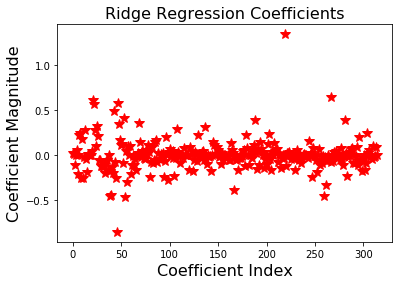

In [29]:
x_index = np.reshape(np.linspace(0,314, num = 315), [315,])

plt.plot(x_index, rid_reg.coef_, linestyle='none', marker = '*', markersize = 10, color = 'red')

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.title('Ridge Regression Coefficients', fontsize=16)
plt.savefig("RidgeCoeff.png")
plt.show()

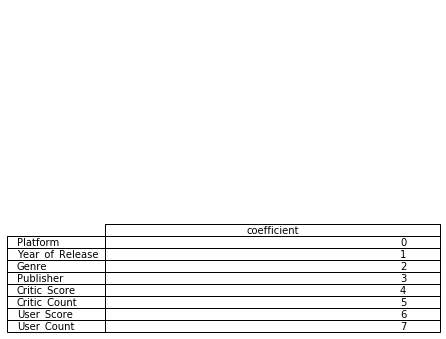

In [27]:
label = ["Platform","Year_of_Release","Genre","Publisher","Critic_Score","Critic_Count","User_Score","User_Count"]
label_df = pd.DataFrame([0,1,2,3,4,5,6,7], label, columns = ["coefficient"])
ax = plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

table(ax, label_df)

plt.savefig("Features.png")

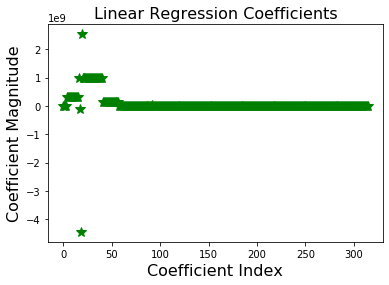

In [26]:
x_index = np.reshape(np.linspace(0,314, num = 315), [315,])

plt.plot(x_index, lin_reg.coef_, linestyle='none', marker = '*', markersize = 10, color = 'green')

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.title('Linear Regression Coefficients', fontsize=16)
plt.savefig('LinearCoeff.png')
plt.show()

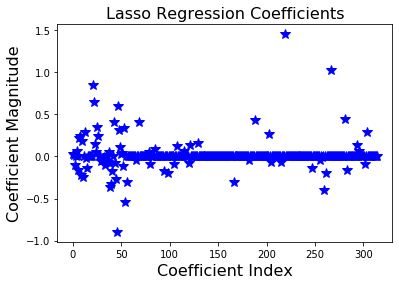

In [28]:
x_index = np.reshape(np.linspace(0,314, num = 315), [315,])

plt.plot(x_index, lasso.coef_, linestyle='none', marker = '*', markersize = 10, color = 'blue')

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.title('Lasso Regression Coefficients', fontsize=16)
plt.savefig("LassoCoeff.png")
plt.show()

Based on the coefficients graph for linear, ridge, and lasso regression after cross validation, we can see that the range of coefficient magnitude is smallest for ridge regression and highest for linear regression. This indicates that the Ridge Regression is the optimal regression model to predict the data we want similar to the observation above. While performing the lasso and ridge regression with the cross validation, we got the result that the best alpha value to choose is the 0.6 and 10, respectively, Those best alpha values are third component of the alpha values we used. If we look at the table above, we can see that "Genre" is the feature that third coefficient is representing. Based on these results, we can say that in order to get the best prediction of global sales of a game, we can use the ridge regression model with the relationship between genre of the game and global sales of the game.

## Conclusion

Ridge Regression is the optimal model for this dataset since it has least RMSE and largest R^2 score